<a href="https://colab.research.google.com/github/ylkim1947/Section1_Project/blob/main/Part1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 확인하세요!

### 제출 전에 모든 코드가 순차적으로 잘 작동하는지 확인하세요. 
- **런타임 다시 시작**한 다음(메뉴바에서 런타임$\rightarrow$런타임 다시 시작 선택) **모든 셀을 실행**해 보세요(메뉴바에서 런타임$\rightarrow$모두 실행 선택).

### 지정 셀의 지정 영역에서만 코드를 작성했는지 확인하세요.
- `YOUR CODE HERE`이 적혀 있는 셀에 대한 코드만 채점에 반영됩니다.
- `YOUR CODE HERE` ~ `YOUR CODE ENDS HERE` 사이에 본인의 코드를 작성하세요.
- 지정 셀 이외에 본인이 코드 실행 결과를 확인하기 위한 용도로 셀을 추가해도 됩니다.
    - **제출 시 지정 셀에서는 정답 이외에 결과 확인을 위한 코드 등은 제거하고 제출해 주세요!**
    - **기존 셀을 삭제하지 마세요! 채점에 불이익이 있을 수 있습니다.**

### 제출 방법
- 시간 내에 문제를 풀고, 본인의 github repo에 push 하세요.
    - **디렉토리 구조가 변하면 안 됩니다.** `codestates/ds-sc2xx`와 디렉토리 구조가 동일해야 합니다. 답안 파일의 이름을 변경하지 않았는지, 기존에 없던 폴더가 추가되지 않았는지 등을 확인하세요.
    - **코드스테이츠 가입 시 연동한 github 계정을 사용해야 합니다.**
    - **branch를 변경하여 작업하지 마세요.**
        - `master` branch에의 제출 사항에 대해서만 평가합니다.
        - 본인의 github repo `master` branch에 제출이 잘 되어 있는지 확인하세요.

---

# SC22x
 
### 코비 브라이언트의 슛 성공 여부 예측해보기

이번 스프린트 챌린지에서는 故 코비 브라이언트 선수의 NBA 필드 골 시도들이 담긴 데이터셋을 다룹니다 (1996년 11월 3일부터 2016년 4월 13일까지의 정규 시즌과 플레이오프 시즌 기록).

여러분은 각 슛의 성공 여부를 슈팅의 대한 정보, 게임에 대한 정보를 통해서 예측해야 합니다. 이것은 상당히 어려운 예측입니다. 해당 데이터셋은 [NBA API]((https://github.com/swar/nba_api) 파이썬 라이브러리를 통해 수집 됐습니다. 

In [1]:
import sys
import warnings

if "google.colab" in sys.modules:
    ## Colab에서 실행하는 경우 필요한 라이브러리를 미리 설치합니다.
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 1.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 245 kB 9.9 MB/s 
     |████████████████████████████████| 4.7 MB 14.0 MB/s 
     |████████████████████████████████| 62 kB 1.1 MB/s 
     |████████████████████████████████| 102 kB 72.4 MB/s 
     |████████████████████████████████| 690 kB 13.1 MB/s 
     |████████████████████████████████| 355 kB 63.7 MB/s 
     |████████████████████████████████| 812 kB 56.5 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=05650032241f2a2e15b197404cc812d7e8095f668147e6e406a359100e92b00d
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=2

In [65]:
# 데이터셋을 불러옵니다
import pandas as pd

url = "https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/nba/nba_kobe_bryant.csv"
df = pd.read_csv(url)

# 데이터셋이 잘 불러졌는지 확인합니다
assert df.shape == (30697, 19)

In [3]:
df.head()

,game_id,game_event_id,player_name,period,minutes_remaining,seconds_remaining,action_type,shot_type,shot_zone_basic,shot_zone_area,shot_zone_range,shot_distance,loc_x,loc_y,shot_made_flag,game_date,htm,vtm,season_type
0,29600027,102,Kobe Bryant,1,0,42,Jump Shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,18,-140,116,0,1996-11-03,LAL,MIN,Regular Season
1,29600031,127,Kobe Bryant,2,10,8,Jump Shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,16,-131,97,0,1996-11-05,NYK,LAL,Regular Season
2,29600044,124,Kobe Bryant,2,8,37,Jump Shot,3PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,23,-142,181,1,1996-11-06,CHH,LAL,Regular Season
3,29600044,144,Kobe Bryant,2,6,34,Jump Shot,3PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,0,0,0,1996-11-06,CHH,LAL,Regular Season
4,29600044,151,Kobe Bryant,2,5,27,Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),8-16 ft.,13,-10,138,1,1996-11-06,CHH,LAL,Regular Season


In [4]:
# 살펴보기
df.isnull().sum()

game_id              0
game_event_id        0
player_name          0
period               0
minutes_remaining    0
seconds_remaining    0
action_type          0
shot_type            0
shot_zone_basic      0
shot_zone_area       0
shot_zone_range      0
shot_distance        0
loc_x                0
loc_y                0
shot_made_flag       0
game_date            0
htm                  0
vtm                  0
season_type          0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   game_id            30697 non-null  int64 
 1   game_event_id      30697 non-null  int64 
 2   player_name        30697 non-null  object
 3   period             30697 non-null  int64 
 4   minutes_remaining  30697 non-null  int64 
 5   seconds_remaining  30697 non-null  int64 
 6   action_type        30697 non-null  object
 7   shot_type          30697 non-null  object
 8   shot_zone_basic    30697 non-null  object
 9   shot_zone_area     30697 non-null  object
 10  shot_zone_range    30697 non-null  object
 11  shot_distance      30697 non-null  int64 
 12  loc_x              30697 non-null  int64 
 13  loc_y              30697 non-null  int64 
 14  shot_made_flag     30697 non-null  int64 
 15  game_date          30697 non-null  object
 16  htm                30697 non-null  objec

In [64]:
df.tail()

,game_id,game_event_id,player_name,period,minutes_remaining,seconds_remaining,action_type,shot_type,shot_zone_basic,shot_zone_area,shot_zone_range,shot_distance,loc_x,loc_y,shot_made_flag,game_date,htm,vtm,season_type
30692,21501228,272,Kobe Bryant,3,9,45,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,25,-96,237,0,20160413,LAL,UTA,Regular Season
30693,21501228,274,Kobe Bryant,3,9,40,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,-4,0,1,20160413,LAL,UTA,Regular Season
30694,21501228,281,Kobe Bryant,3,9,0,Jump Shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,31,-32,313,0,20160413,LAL,UTA,Regular Season
30695,21501228,200,Kobe Bryant,2,4,56,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,6,-5,1,20160413,LAL,UTA,Regular Season
30696,21501228,72,Kobe Bryant,1,4,14,Driving Reverse Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,-17,-11,1,20160413,LAL,UTA,Regular Season


# Part 1 - Data Preprocessing

## 1.1 분류를 위한 베이스라인 정확도를 계산하는 `calculate_baseline_score` 함수를 작성하세요.
- 예측해야 하는 target은 `shot_made_flag` 입니다. 
- 전체 데이터를 써서 baseline **accuracy score**를 계산하세요.
- 최빈 클래스를 사용하는 baseline을 가정하세요.

In [66]:
def calculate_baseline_score(df):
    accuracy_score = 0

    # YOUR CODE HERE
    freq = df['shot_made_flag'].value_counts() 
    total = df['shot_made_flag'].count()
    accuracy_score = freq[0]/total

    # YOUR CODE ENDS HERE

    return accuracy_score

In [22]:
baseline_accuracy_score = calculate_baseline_score(df)

In [23]:
print("baseline accuracy score:", baseline_accuracy_score)

baseline accuracy score: 0.5526924455158485


## 1.2 데이터셋을 아래의 기준을 사용해서 train/test 셋으로 나누는 `split_data` 함수를 작성하세요.

- `test set`: **2014-15** ~ **2015-16** 시즌
- NBA 시즌은 **10월**에 시작해서 **6월**에 종료합니다. 

In [166]:
def split_data(df):
    train = None
    test = None

    # YOUR CODE HERE
    df1 = df.copy()
    df1['game_date'].replace(regex=r'[-]',value='',inplace=True)
    df1['game_date']=df1['game_date'].astype('int')
    train = df[df1['game_date'] < 20141001]
    test = df[df1['game_date'] >= 20141001]

    # YOUR CODE ENDS HERE

    return train, test

In [167]:
train, test = split_data(df.copy())

In [168]:
train

,game_id,game_event_id,player_name,period,minutes_remaining,seconds_remaining,action_type,shot_type,shot_zone_basic,shot_zone_area,shot_zone_range,shot_distance,loc_x,loc_y,shot_made_flag,game_date,htm,vtm,season_type
0,29600027,102,Kobe Bryant,1,0,42,Jump Shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,18,-140,116,0,1996-11-03,LAL,MIN,Regular Season
1,29600031,127,Kobe Bryant,2,10,8,Jump Shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,16,-131,97,0,1996-11-05,NYK,LAL,Regular Season
2,29600044,124,Kobe Bryant,2,8,37,Jump Shot,3PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,23,-142,181,1,1996-11-06,CHH,LAL,Regular Season
3,29600044,144,Kobe Bryant,2,6,34,Jump Shot,3PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,0,0,0,1996-11-06,CHH,LAL,Regular Season
4,29600044,151,Kobe Bryant,2,5,27,Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),8-16 ft.,13,-10,138,1,1996-11-06,CHH,LAL,Regular Season
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28866,21300366,34,Kobe Bryant,1,7,45,Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,2,0,1,2013-12-17,MEM,LAL,Regular Season
28867,21300366,16,Kobe Bryant,1,10,9,Turnaround Fadeaway shot,2PT Field Goal,Mid-Range,Right Side(R),8-16 ft.,11,106,50,1,2013-12-17,MEM,LAL,Regular Season
28868,21300366,5,Kobe Bryant,1,11,13,Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,0,1,0,2013-12-17,MEM,LAL,Regular Season
28869,21300366,2,Kobe Bryant,1,11,41,Jump Shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,22,-130,183,0,2013-12-17,MEM,LAL,Regular Season


## 1.3 새로운 feature를 만드는 `feature_engineering` 함수를 작성하세요.

- 새로운 이름을 갖는 최소 2개 이상의 새로운 feature를 만드세요. 아래의 리스트를 사용하셔도 되고 스스로의 아이디어로 만들어 주셔도 괜찮습니다.
    - **Homecourt Advantage**: 홈 팀(`htm`)이 Los Angeles Lakers (`LAL`)인지 여부
    - **Opponent**: LA Lakers를 상대하는 팀을 나타내는 feature
    - **Seconds remaining in the period**: 피리어드에 남은 총 시간 (분과 초를 합칩니다)
    - **Seconds remaining in the game**: 게임에 남은 총 시간 (피리어드와 초를 합칩니다). 농구에서 게임은 총 4개의 피리어드로 이루어져 있습니다 (각 12분)
    - **Made previous shot**: 코비 브라이언트의 예전 슛이 성공했는지 여부
- 학습에 사용하지 않는 특성은 drop하세요.
    

In [205]:
def feature_engineering(df):
    df_tmp = df.copy()

    # YOUR CODE HERE
    df_tmp['Homecourt Advantage'] =0
    df_tmp.loc[df_tmp['htm'] == 'LAL', 'Homecourt Advantage'] =1
    df_tmp['Seconds remaining in the period'] = df_tmp['minutes_remaining'] *60 + df_tmp['seconds_remaining'] 
    df_tmp['Seconds remaining in the game'] = (4-df_tmp['period'])*12*60 + df_tmp['Seconds remaining in the period']
    df_tmp['Opponent'] = df_tmp['htm'] + df_tmp['vtm']
    df_tmp['Opponent'].replace(regex=r'[LAL]',value='',inplace=True)

    df_tmp.drop(['loc_x','loc_y','player_name','htm','vtm'],axis =1, inplace = True)

    # YOUR CODE ENDS HERE

    return df_tmp

In [206]:
train_processed = feature_engineering(train)
test_processed = feature_engineering(test)

In [207]:
train_processed.head()

,game_id,game_event_id,period,minutes_remaining,seconds_remaining,action_type,shot_type,shot_zone_basic,shot_zone_area,shot_zone_range,shot_distance,shot_made_flag,game_date,season_type,Homecourt Advantage,Seconds remaining in the period,Seconds remaining in the game,Opponent
0,29600027,102,1,0,42,Jump Shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,18,0,1996-11-03,Regular Season,1,42,2202,MIN
1,29600031,127,2,10,8,Jump Shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,16,0,1996-11-05,Regular Season,0,608,2048,NYK
2,29600044,124,2,8,37,Jump Shot,3PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,23,1,1996-11-06,Regular Season,0,517,1957,CHH
3,29600044,144,2,6,34,Jump Shot,3PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,0,1996-11-06,Regular Season,0,394,1834,CHH
4,29600044,151,2,5,27,Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),8-16 ft.,13,1,1996-11-06,Regular Season,0,327,1767,CHH


In [208]:
test_processed.head()

,game_id,game_event_id,period,minutes_remaining,seconds_remaining,action_type,shot_type,shot_zone_basic,shot_zone_area,shot_zone_range,shot_distance,shot_made_flag,game_date,season_type,Homecourt Advantage,Seconds remaining in the period,Seconds remaining in the game,Opponent
28871,21400003,76,1,6,13,Jump Shot,2PT Field Goal,Mid-Range,Center(C),16-24 ft.,20,0,2014-10-28,Regular Season,1,373,2533,HOU
28872,21400003,94,1,4,45,Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,6,1,2014-10-28,Regular Season,1,285,2445,HOU
28873,21400003,413,3,5,52,Turnaround Jump Shot,2PT Field Goal,Mid-Range,Right Side(R),16-24 ft.,18,0,2014-10-28,Regular Season,1,352,1072,HOU
28874,21400003,520,4,9,36,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,27,0,2014-10-28,Regular Season,1,576,576,HOU
28875,21400003,553,4,7,16,Jump Shot,2PT Field Goal,Mid-Range,Left Side(L),16-24 ft.,19,0,2014-10-28,Regular Season,1,436,436,HOU


## 1.4 train / test 셋을 features(X)와 target(y)으로 각각 나누는 `divide_data` 함수를 작성하세요.
- `pd.DataFrame` 형태의 `X`와 `pd.Series` 형태의 `y`를 반환하세요.

In [209]:
def divide_data(df):
    X = None
    y = None

    # YOUR CODE HERE

    target = 'shot_made_flag'
    features = df.drop(columns=[target]).columns
    X = df[features]
    y = df[target]
    # YOUR CODE ENDS HERE

    return X, y

In [210]:
X_train, y_train = divide_data(train_processed)
X_test, y_test = divide_data(test_processed)

In [211]:
X_train.shape, X_test.shape

((28871, 17), (1826, 17))

# Part 2 - Modeling & Evaluation

## 2.1 Decision Tree 또는 RandomForest 모델 학습 파이프라인을 생성하고 학습하는 `fit_trees` 함수를 작성하세요. 
- Scikit-learn의 `pipeline`을 활용하여 범주형 feature의 encoder, imputer, 모델을 포함하는 하나의 학습 파이프라인을 구축하세요.
- 구축한 파이프라인에 대해 `RandomizedSearchCV`를 사용해 CV를 진행하세요.
    - 적어도 두 개 이상의 하이퍼파라미터에 대해 탐색을 진행하세요.
    - F1 score을 최대화하는 하이퍼파라미터 조합을 선택하세요.
- RandomForestClassifier, RandomizedSearchCV 등 랜덤성이 포함되는 방법론에 대해 모두 `random_state=42`로 하세요.
- cv는 5 이하, n_iter은 10회 이하로 하세요.

In [216]:
import sklearn
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from category_encoders import OrdinalEncoder, OneHotEncoder

### IMPORT ANY
# YOUR CODE HERE
from scipy.stats import randint, uniform



# YOUR CODE ENDS HERE


def fit_trees(X_train, y_train):
    pipe = None    # pipe = make_pipeline(...)
    clf = None     # clf = RandomizedSearchCV(pipe, ...)

    # YOUR CODE HERE
    pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42, max_depth=None, oob_score=True)
    )
    dists = {
   'randomforestclassifier__n_estimators': [600, 1000], 
    'randomforestclassifier__max_depth': [15, 20, None], 
    'randomforestclassifier__max_features': uniform(0, 1) # max_features
    }

    clf = RandomizedSearchCV(
        pipe, 
        param_distributions=dists, 
        n_iter=4, 
        cv=3, 
        scoring='f1', # ‘f1’, ‘roc_auc’,‘precision’, ‘recall’, accuracy
        verbose=1,
        n_jobs=-1,
        random_state=42,
        error_score= 'raise')

    clf.fit(X_train, y_train);
    
    # YOUR CODE ENDS HERE

    return clf

In [217]:
clf = fit_trees(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


In [218]:
print("Best CV F1", clf.best_score_)
print("Best CV params", clf.best_params_)

Best CV F1 0.5466475926645029
Best CV params {'randomforestclassifier__max_depth': None, 'randomforestclassifier__max_features': 0.7965429868602328, 'randomforestclassifier__n_estimators': 600}


## 2.2 학습된 모델로부터 feature importance를 계산하는 `get_feature_importances` 함수를 작성하세요. 
- feature_importances 변수에 RandomForest / Decision Tree의 feature_importances_ 값을 할당하면 됩니다.

In [219]:
import numpy as np


def get_feature_importances(pipe, feature_names):
    feature_importances = np.zeros(len(feature_names))

    # YOUR CODE HERE
    feature_importances= clf.best_estimator_.named_steps["randomforestclassifier"].feature_importances_
    #importances_ord = pd.Series(feature_importances, X_train.columns)    
    # YOUR CODE ENDS HERE

    return sorted(
        list(zip(feature_names, feature_importances)), key=lambda x: x[1], reverse=True
    )

In [220]:
feature_importances = get_feature_importances(
    clf.best_estimator_, list(X_train.columns)
)

In [221]:
for name, importance in feature_importances:
    print(f"{name}: {importance:.4f}")

action_type: 0.1385
game_event_id: 0.1101
game_date: 0.1072
seconds_remaining: 0.1027
Seconds remaining in the period: 0.1019
game_id: 0.0994
Seconds remaining in the game: 0.0945
Opponent: 0.0882
shot_distance: 0.0666
shot_zone_area: 0.0255
minutes_remaining: 0.0227
Homecourt Advantage: 0.0155
shot_zone_basic: 0.0091
shot_zone_range: 0.0071
period: 0.0058
season_type: 0.0033
shot_type: 0.0017


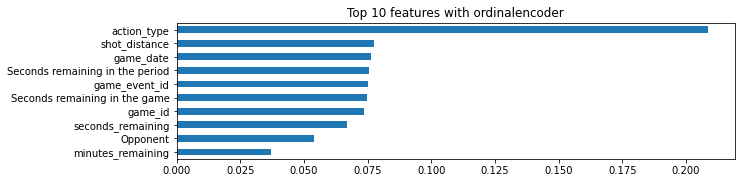

In [223]:
import matplotlib.pyplot as plt
n = 10


plt.figure(figsize=(10,n/4))
plt.title(f'Top {n} features with ordinalencoder')
importances_ord.sort_values()[-n:].plot.barh();

## 2.3 본인이 만든 모델의 Test 셋에서의 성능을 확인해 보세요.
- ### test_accuracy > 0.6, test_f1 > 0.5를 만족하면 기본 성능점수를 얻습니다.
- ###  (도전과제) test_accuracy > 0.68, test_f1 > 0.54을 만족하면 성능점수 만점을 얻습니다.
  - 도전과제까지 수행해야 스챌 3점을 얻습니다. 
  - 1.3으로 돌아가 다양한 특성 조합을 시도해 보세요. 
    - 그리고 2.2로 돌아와 피쳐 중요도를 계산해 보세요.
    - 어떤 피쳐의 중요도가 가장 높나요?
    - 중요도가 낮은 피쳐라도 있는 게 좋을까요?
  - 2.1로 돌아가 SearchCV에서 다양한 하이퍼파라미터 옵션 조합을 선택해 보세요.
    - 본인이 선택한 모델에서, 각 하이퍼파라미터가 어떤 의미를 가지나요?
    - SearchCV가 더 다양한 하이퍼파라미터 조합을 시도하도록 하기 위해 SearchCV의 어떤 옵션을 조정해야 할까요?

In [224]:
def calculate_score(pipe, X_test, y_test):
    test_accuracy = pipe.score(X_test, y_test)
    test_f1 = f1_score(y_test, pipe.predict(X_test))
    return test_accuracy, test_f1

In [225]:
test_accuracy, test_f1 = calculate_score(clf.best_estimator_, X_test, y_test)

In [226]:
print("test accuracy: ", test_accuracy)
print("test F1:", test_f1)

test accuracy:  0.5958378970427163
test F1: 0.4924346629986245


In [227]:
print("test accuracy > 0.68?: ", test_accuracy > 0.68)
print("test F1 > 0.54?:", test_f1 > 0.54)


test accuracy > 0.68?:  False
test F1 > 0.54?: False


---

# 수고하셨습니다!